# Before running, follow [this link](https://drive.google.com/drive/folders/1LtBzH3yQi1Hjf9-eybKTz4g9H3fIXlP0?usp=sharing) to upload different maze images to the runtime. Block 4 outputs the solution to the maze.
# Version 1:
Version 1 of this code runs the model and returns the final maze solution. This current file is configured in Version 1 and can be run immediately. The final block of this code is intended only for Version 2, and can be ignored.
# Version 2:
Version 2 is intended to provide better analysis of the algorithm's convergence rate. Version 2 of this file requires you to either download or copy this file so that edits can be made. Then, follow the notes in this file to comment/uncomment Version 1 and Version 2 lines.

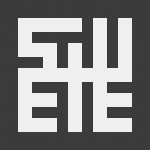

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# read in maze image... uploaded from https://drive.google.com/drive/folders/1LtBzH3yQi1Hjf9-eybKTz4g9H3fIXlP0?usp=sharing
maze_img = cv2.imread("maze_1.png", 0)

# define grid dimensions
grid_rows = 11
grid_columns = grid_rows

# display image
cv2_imshow(maze_img)

# create empty 3D NumPy array for grid locations
q_values = np.zeros((grid_rows, grid_columns, 4))

print(q_values)

#actions
actions = ['up', 'down', 'left', 'right']

### REWARDS ###
rewards = np.full((grid_rows, grid_columns), -100)

# assign reward values to white spaces
for i in range(grid_columns - 1):
    for j in range(grid_rows - 1):
        x = 12 + (13*i)
        y = 12 + (13*j)
        color = maze_img[x, y]
        if color > 100:
            rewards[i, j] = -1.
# reward for end
rewards[9, 9] = 1000000

for row in rewards:
    print(row)

# See the two notes at the end of this block for toggling Version 1 and Version 2

In [ ]:
from textwrap import shorten
#define a function that determines if the specificed location is a terminal states
def is_terminal_state(current_row_index, current_column_index):
    #if the reward for this location is -1, then it is not a terminal state
    if rewards[current_row_index, current_column_index] == -1.:
        return False
    else:
        return True

#define a function that will choose a random, non-terminal starting location
def get_starting_location():
    #get a random row and column index
    current_row_index = np.random.randint(grid_rows)
    current_column_index = np.random.randint(grid_columns)
    #continue choosing random row and column indexes until a non-terminal state is identified
    while is_terminal_state(current_row_index, current_column_index):
        current_row_index = np.random.randint(grid_rows)
        current_column_index = np.random.randint(grid_columns)
    return current_row_index, current_column_index

#define an epsilon greedy algorithm that will choose which action to take next
def get_next_action(current_row_index, current_column_index, epsilon):
    #if a randomly chose value between 0 and 1 is less than epsilon,
    #then choose the most promising value from the Q-table for this state
    if np.random.random() < epsilon:
        return np.argmax(q_values [current_row_index, current_column_index])
    else: #choose random action
        return np.random.randint(4)

#define a function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if actions[action_index] == 'up' and current_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and current_column_index < grid_columns - 1:
        new_column_index += 1
    elif actions[action_index] == 'down' and current_row_index < grid_rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index



#Define a function that will get the shortest path between any location within
#the warehouse that the robot is allowed to travel and the item packaging location
def get_shortest_path(start_row_index, start_column_index):
    #return immediately if this is an invalid starting location
    if is_terminal_state(start_row_index, start_column_index): #func returns T/F
        return []
    else: #if this is a 'legal' starting location
        reward_total = 0
        current_row_index, current_column_index = start_row_index, start_column_index
        shortest_path = []
        shortest_path.append([current_row_index, current_column_index])
        #continue moving along the path until we reach the goal
        while not is_terminal_state(current_row_index, current_column_index) and reward_total > -120:
            #get the best action to take
            action_index = get_next_action(current_row_index, current_column_index, 1.)
            #move to the next location on the path, and add the new location to the list
            current_row_index, current_column_index = get_next_location(
                                current_row_index,current_column_index, action_index)
            shortest_path.append([current_row_index, current_column_index])
            current_reward = rewards[current_row_index, current_column_index]
            reward_total = reward_total + current_reward

#COMMENT THIS NEXT LINE OUT FOR VERSION 2 OF THE CODE
    return shortest_path

# UNCOMMENT THE REST OF THIS BLOCK FOR VERSION 2 OF THE CODE
    # if reward_total < 0:
    #     return 0
    # else:
    #     return 1


In [ ]:
#define training parameters
epsilon = 1.0       #percentage of time when best action should be chosen
discount_factor = 0.9       #discount factor for future rewards
learning_rate = 0.9         #rate at which AI agent should learn

def train_model(num_training_episodes):
    #run through 1000 training episodes
    for episode in range(num_training_episodes):
        #get the starting location for this episode
        row_index, column_index = get_starting_location()

        #continue taking actions until we reach a terminal state
        while not is_terminal_state(row_index, column_index):
            #choose an action
            action_index = get_next_action(row_index, column_index, epsilon)

            #perform the chosen action, and transition to the next state
            old_row_index, old_column_index = row_index, column_index   #store in old row and column indexes
            row_index, column_index = get_next_location(row_index, column_index, action_index)

            #receive the reward for moving to the new state, and calculate the temporal difference
            reward = rewards[row_index, column_index]
            old_q_value = q_values[old_row_index, old_column_index, action_index]
            temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

            #update q-value for prvious state and action pair
            new_q_value = old_q_value + (learning_rate *  temporal_difference)
            q_values[old_row_index, old_column_index, action_index] = new_q_value

    # print ('Training complete!')

# For this next block, either run as is for Version 1 OR comment out the first three lines and uncomment the rest of the block for Version 2


In [ ]:
training_episodes = 400
train_model(training_episodes)
print("The solution is: ", get_shortest_path(1,1))

# import matplotlib.pyplot as plt

# tot_episodes = []
# correct_sol_prob = []

# training_episodes = 1  # initialize the training_episodes variable

# for i in range(400):
#     tot_episodes.append(i+1)  # append to the list
#     prob = 0  # initialize probability for each episode
#     for j in range(20):
#         prob += get_shortest_path(1, 1)
#         q_values = np.zeros((grid_rows, grid_columns, 4))
#         train_model(training_episodes)
#     correct_sol_prob.append(prob/20*100)  # calculate average probability and append
#     training_episodes += 1
#     print(i)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# All blocks beyond this should be uncommented for Version 2 of this file


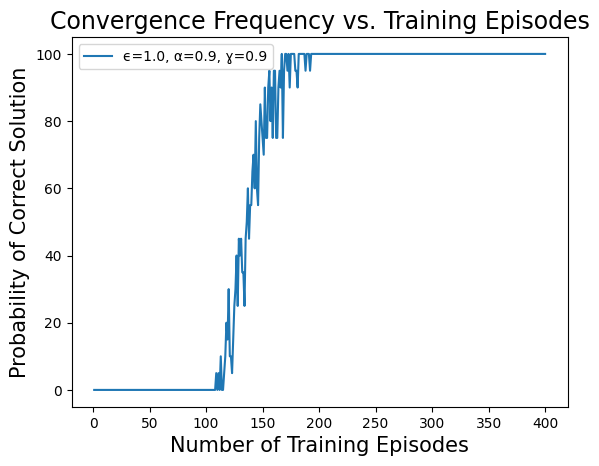

In [ ]:
# label_str = "ϵ={}, α={}, ɣ={}".format(epsilon, learning_rate, discount_factor)
# plt.plot(tot_episodes, correct_sol_prob, label=label_str)
# plt.legend()
# plt.title("Convergence Frequency vs. Training Episodes", fontsize = 17)
# plt.xlabel("Number of Training Episodes", fontsize = 15)
# plt.ylabel("Probability of Correct Solution", fontsize = 15)
# # plt.xlim([0, 600])
# plt.show()  # add this line to display the plot



